In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/Week9_Thuchanh3/credit.csv')
data

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No
5,6,Middle,False,False,Fair,No
6,7,Middle,False,False,Good,No
7,8,Middle,True,True,Good,Yes
8,9,Middle,False,True,Excellent,Yes
9,10,Middle,False,True,Excellent,Yes


In [ ]:
X = data.iloc[:, 1:-1]  # các cột đầu tiên là các feature
X

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING
0,Young,False,False,Fair
1,Young,False,False,Good
2,Young,True,False,Good
3,Young,True,True,Fair
4,Young,False,False,Fair
5,Middle,False,False,Fair
6,Middle,False,False,Good
7,Middle,True,True,Good
8,Middle,False,True,Excellent
9,Middle,False,True,Excellent


In [ ]:
y = data.iloc[:, -1]  # cột cuối là nhãn
y

0      No
1      No
2     Yes
3     Yes
4      No
5      No
6      No
7     Yes
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13    Yes
14     No
Name: CLASS, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING
0,2,0,0,1
1,2,0,0,2
2,2,1,0,2
3,2,1,1,1
4,2,0,0,1
5,0,0,0,1
6,0,0,0,2
7,0,1,1,2
8,0,0,1,0
9,0,0,1,0


In [ ]:
# Tạo cây quyết định với thuật toán ID3
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X.values, y)

DecisionTreeClassifier(criterion='entropy')

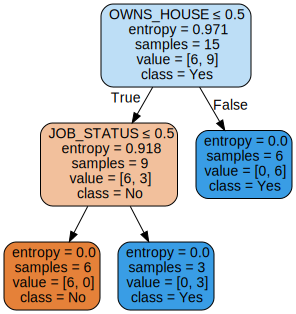

In [ ]:
# Vẽ cây quyết định bằng graphviz
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
X_test = X.iloc[-1, :] # Lấy dữ liệu của Class tại ID 15
X_test

AGE              1
JOB_STATUS       0
OWNS_HOUSE       0
CREDIT_RATING    1
Name: 14, dtype: int64

In [ ]:
y_ID15 = dt.predict([X_test]) # Dự đoán kết quả quyết định từ Class tại ID 15
y_ID15

array(['No'], dtype=object)

In [ ]:
%%html

UsageError: %%html is a cell magic, but the cell body is empty.
